# Aprendizaje supervisado - *k* vecinos más cercanos

El clasificdor basado en los *k* vecinos más cercanos, usa la información del conjunto de entrenamiento para calcular las distancias entre la observación de test o validación y las observaciones de entrenamiento. Usualmente se utiliza la distancia euclidea para encontrar los vecinos más cercanos a la muestra de validación.

$$d(X_{i},X_{j})=\sqrt{\sum_{r=1}^{p}(x_{ri}-x_{rj})^{2}}$$

Una vez se han encontrado los *k* vecinos, se procede a aplicar una regla mayoritaria para elegir la clase de la nueva muestra. 



** Ejercicio 1**

Elabora un algoritmo de clasificación basado en los *k* vecinos más cercanos y utilizando la distancia euclidea. Como datos de entrenamiento utiliza como matriz de observaciones el siguiente *toyset*:

$$X_{train} =\left[\begin{array}{cc}
2.1 & 1.3\\
1.3 & 3.2\\
2.9 & 2.5\\
2.7 & 5.4\\
3.8 & 0.9\\
7.3 & 2.1\\
4.2 & 6.5\\
3.8 & 3.7\\
2.5 & 4.1\\
3.4 & 1.9\\ 
5.7 & 3.5\\
6.1 & 4.3\\
5.1 & 2.2\\
6.2 & 1.1
\end{array}\right]$$

como vector de etiquetas:

$$y_{train} = [0\quad0\quad0\quad1\quad0\quad0\quad1\quad1\quad1\quad0\quad1\quad1\quad1\quad1]^{\top}$$

y como test:

$$X_{test}= [4.3 \quad  2.7]$$

El algoritmo debe cumplir lo siguiente:

1. Se debe poder elegir el valor de los vecinos más cercanos.
2. Debe mostrar las distancias a todos los elementos del entrenamiento.
3. Debe mostrar el índice y valor de las observaciones elegidas como las *k* más cercanas.
4. Debe otorgarle  una etiqueta al test a partir de la regla mayoritaria.
5. Debe mostrar gráficamente todo el conjunto de entrenamiento, el test y los *k* vecicnos más cercanos.


In [1]:
#espacio para resolver el ejercicio 1
#Declaraciones
import numpy as np
import matplotlib.pyplot as plt #importamos la librería para graficar

X_train = np.array([[2.1,1.3],
                    [1.3,3.2],
                    [2.9,2.5],
                    [2.7,5.4],
                    [3.8,0.9],
                    [7.3,2.1],
                    [4.2,6.5],
                    [3.8,3.7],
                    [2.5,4.1],
                    [3.4,1.9],
                    [5.7,3.5],
                    [6.1,4.3],
                    [5.1,2.2],
                    [6.2,1.1]]) 
y_train = np.array([0,0,0,1,0,0,1,1,1,0,1,1,1,1])

#Punto 1
X_test = np.array([4.3,2.7])


def remocion_train_test(X_train,X_test): #Método para preprocesar X_train y X_test con remoción de la media
    media_train = X_train.mean(axis = 0) # calculamos la media del conjunto de entrenamiento
    desviacion_train = X_train.std(axis = 0) # calculamos la desviacion estándar del conjunto de entrenamiento
    
    X_train_rem = (X_train - media_train)/desviacion_train # preprocesamos la matriz de entrenamiento
    X_test_rem = (X_test - media_train)/desviacion_train # preprocesamos la matriz de validacion o test
    
    return X_train_rem, X_test_rem

#Método para procesar X_train y X_test mediante k vecinos mas cercanos con distancia euclidiana
def k_vecinos (X_train, X_test, numero_vecinos): 
    X_procesado = np.array([]) #Creo array para procesar los datos

    #Punto 2 - Distancia euclidiana
    filas = np.shape(X_train)[0]
    columnas = np.shape(X_train)[1]

    for i in range(filas): #Recorro por filas ya que la formula es sumar los resultados de las restas, y se resta por filas
        temp = 0 #Valor temporal de la suma de todas las restas posibles (una con cada valor de la fila)
        for j in range(columnas):
            #X_test tiene las mismas columnas que X_train, y lo único que cambia es 
            # el valor que tenga X_train en cada posición de sus filas
            temp += pow(X_test[j] - X_train[i][j],2) 
            
        X_procesado = np.append(X_procesado, np.sqrt(temp)) #Añadir al vector a entregar la raiz cuadrada del valor calculado    

    #Punto 3 - k vecinos más cercanos
    X_vecinos = np.sort(X_procesado)[0:numero_vecinos] #Ordeno de menor a mayor el vector con los valores procesados 
                                                        # y solo guardo el numero de vecinos pedidos
    X_temp = np.zeros_like(X_vecinos) #Creo array a entregar
    
    for i in range(numero_vecinos): #Recorro por cada uno de los vecinos
        for j in range (len(X_procesado)): #En todas las distancias
                if X_procesado[j] == X_vecinos[i]: #Si el valor de la distancia es igual al valor de un vecino
                    X_temp[i] = j #Guardar el valor de j (número de la fila)
   
    X_vecinos = X_vecinos.reshape(numero_vecinos,1) #Vuelvo X_vecinos de un vector de 1 fila a un vector de 1 sola columna 
    X_temp = X_temp.reshape(numero_vecinos,1) #Vuelvo X_vecinos de un vector de 1 fila a un vector de 1 sola columna
    
    #Añado a X_vecinos una segunda columna, es el número de la fila donde se encuentra el valor de la distancia correspondiente
    X_vecinos = np.append(X_temp, X_vecinos, axis=1) 
   
    #Devuelvo una matrix de 2 columnas y varias filas, donde cada fila contiene el valor de la distancia y 
    # su ubicación en la matriz de datos original
    #Además de X_procesado que tiene todas las distancias calculadas
    return X_vecinos, X_procesado 

La etiqueta 1 se encuentra 3 veces entre los vecinos


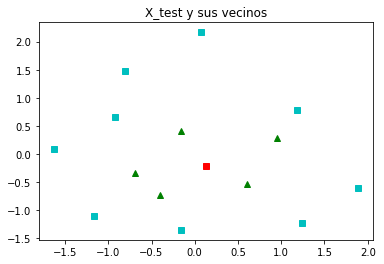

In [2]:
X_train_remocion, X_test_remocion = remocion_train_test(X_train, X_test)
X_k_vecinos, X_distancias = k_vecinos(X_train_remocion,X_test_remocion, 5)
# print(X_k_vecinos, '\n', X_distancias)

#Punto 4
#X_train_remocion_vecinos son las filas de los vecinos en X_train_remocion 
X_train_remocion_vecinos = X_train_remocion[X_k_vecinos[:,0].astype(int),:]

#etiqueta es un vector de dos posiciones, donde el primer valor es la etiqueta que más se repita entre los vecinos
# y el segundo valor es cuantas veces está entre los vecinos
etiqueta = np.array([0,0])
for i in range(len(np.unique(y_train))):
#     print(np.where(y_train[X_k_vecinos[:,0].astype(int)] == np.unique(y_train)[i]))
#     print(np.shape(np.where(y_train[X_k_vecinos[:,0].astype(int)] == np.unique(y_train)[i]))[1])

    #contador es el numero de veces que una etiqueta se encuentra entre los vecinos
    contador = np.shape(np.where(y_train[X_k_vecinos[:,0].astype(int)] == np.unique(y_train)[i]))[1]
    if etiqueta[1] < contador:
        etiqueta[1] = contador
        etiqueta[0] = np.unique(y_train)[i]
print('La etiqueta', etiqueta[0], 'se encuentra', etiqueta[1], 'veces entre los vecinos')
     
#Punto 5 
# Entrenamiento vs Test y k_vecinos
plt.title('X_test y sus vecinos')

#Para evitar graficar los vecinos creo un array igual a X_train_remocion con todas las máscaras falsas
X_train_remocion_sin_vecinos = np.ma.array(X_train_remocion[:,:], mask=False) 

#Pongo las mascaras de las filas de los vecinos positivas
X_train_remocion_sin_vecinos.mask[X_k_vecinos[:,0].astype(int)] = True 
# print(X_train_remocion_sin_vecinos)

plt.plot(X_test_remocion[0], X_test_remocion[1], 'rs') #Grafico el dato que elegimos para X_test

# Grafico los vecinos que son X_train_remocion en las posiciones de los vecinos
plt.plot(X_train_remocion_vecinos[:,0], X_train_remocion_vecinos[:,1], 'g^')

#Grafico los puntos de X_train_remocion_sin_vecinos para evitar graficar los vecinos
plt.plot(X_train_remocion_sin_vecinos[:,0], X_train_remocion_sin_vecinos[:,1], 'cs') 

plt.show()

## Implementación del clasificador basado en los *k* vecinos más cercanos o *k*-NN

In [3]:
#cargamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt #librerías para graficar
import matplotlib.cm as cm
from sklearn import neighbors, datasets
plt.style.use('_classic_test') #cambia el estilo de los gráficos

In [4]:
print(plt.style.available) #imprime los posibles estilos. No se necesita para el código pero hay unos muy bonitos :)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
#cargamos los datos de entrada
input_file = 'Data_kNN.txt' #almacenamos el nombre del archivo
data = np.genfromtxt(input_file, delimiter=',', skip_header=True) #almacenamos la información 
X, y = data[:,:-1], data[:,-1].astype(np.int) #dividimos la información del archivo en la matriz de observaciones y el vector de etiquetas
# print(data)

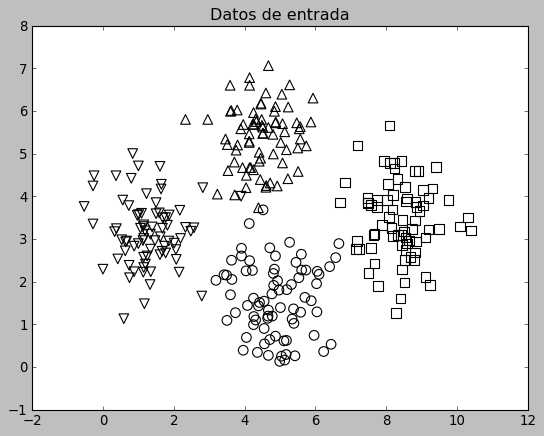

In [6]:
#visualizamos los datos de entrada. Esta es una forma diferente para graficar, aunque lo generado en clases anteriores también
#se puede utilizar
plt.figure()  #generamos una nueva figura
plt.title('Datos de entrada')  #asignamos un título
marcadores = 'v^os' #definimos una cadena de marcadores para hacer más fácil la gráfica 
marcador = [marcadores[i] for i in y] #generamos una lista con los marcadores 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marcador[i],  #graficamos observación por observación   
            s=75, edgecolors='black', facecolors='none')
plt.show() #generamos la gráfica

In [8]:
NN = 11 #definimos el número de vecinos (en lo posible elegir números impares)
clasificador = neighbors.KNeighborsClassifier(NN, weights = 'distance') #instanciamos el clasificador

** Ejercicio 2**

Realiza la partición de la base de datos en 70% entrenamiento, 30% validación o test

In [9]:
#espacio para resolver el ejercicio 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [10]:
clasificador.fit(X_train,y_train) #entrenamos el clasificador

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='distance')

** Ejercicio 3**

Visualiza las fronteras del clasificador con el conjunto de entrenamiento

In [11]:
def visualizar_clasificador(clasificador, X, y): #definimos la función. Las entradas son el clasificador (instanciamiento), 
    #la matriz de observaciones y el vector de etiquetas.
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 1 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 2
    #definimos el paso de la malla (todos los valores que nos permiten graficar las fronteras)
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

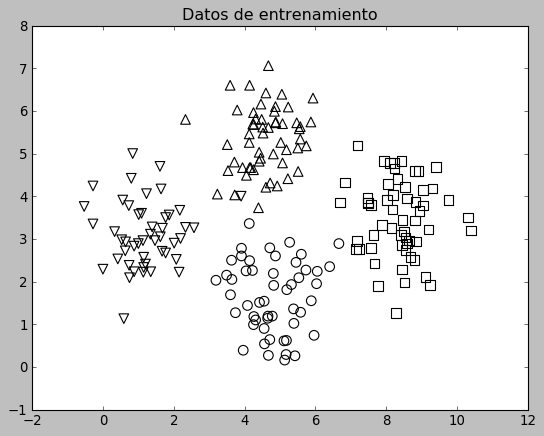

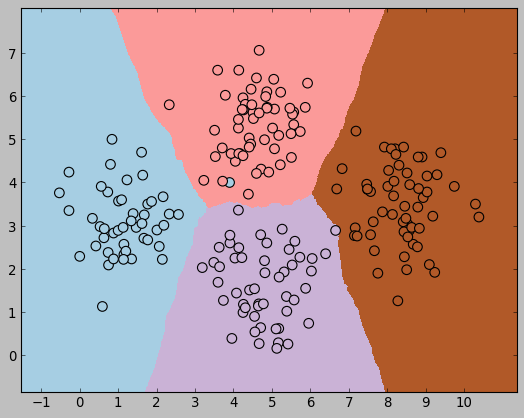

In [12]:
#espacio para resolver el ejercio 3
#visualizamos los datos de entrada. Esta es una forma diferente para graficar, aunque lo generado en clases anteriores también
#se puede utilizar
# print(X_train)
# print(y_train)
#Visualizamos los datos de entrenamiento
plt.figure()  #generamos una nueva figura
plt.title('Datos de entrenamiento')  #asignamos un título
marcadores = 'v^os' #definimos una cadena de marcadores para hacer más fácil la gráfica 
marcador = [marcadores[i] for i in y] #generamos una lista con los marcadores 
for i in range(X_train.shape[0]): 
    plt.scatter(X_train[i, 0], X_train[i, 1], marker=marcador[y_train[i]],  #graficamos observación por observación   
            s=75, edgecolors='black', facecolors='none')
plt.show() #generamos la gráfica

#Visualizamos el clasificador vs los datos de entrenamiento
visualizar_clasificador(clasificador, X_train, y_train)

In [13]:
y_pred = clasificador.predict(X_test) #realizamos la predicción de la etiqueta para el conjunto de validación

** Ejercicio 4 **

Imprime el acierto de clasificación en porcentaje y grafica las fronteras del clasificador para el conjunto de validación

In [14]:
#espacio para resolver el ejercicio 4
acc = 100.0*(y_test == y_pred).sum()/X_test.shape[0] #calculamos el acierto de clasificación
print('El acierto de clasificación es del ',acc , '%') #imprimimos el acierto de clasificacion


El acierto de clasificación es del  96.66666666666667 %
